# Introduction

Notebook to aggregate the running of models in the context of traceability between **test cases** and **bug reports**.

# Load Libraries and Datasets

In [22]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import tc_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

testcases = fd.Datasets.read_testcases_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [23]:
exp_vol_intersec_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

OracleExpertVolunteers_INTERSEC.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [24]:
evals_df_2.head()

model           ref_name  perc_precision  perc_recall  perc_fscore  \
0   lsi  top_10_cosine_0.0           24.29         43.0        31.04   
1   lsi  top_10_cosine_0.1           24.29         43.0        31.04   
2   lsi  top_10_cosine_0.2           24.37         43.0        31.10   
3   lsi  top_10_cosine_0.3           24.39         43.0        31.13   
4   lsi  top_10_cosine_0.4           24.45         43.0        31.17   

   sim_threshold   top  \
0            0.0  10.0   
1            0.1  10.0   
2            0.2  10.0   
3            0.3  10.0   
4            0.4  10.0   

                                                                                                                                                                                                                                                                                                                                                                                                    trace_links_df  
0  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
1  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
2  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
3  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
4  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...

In [25]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

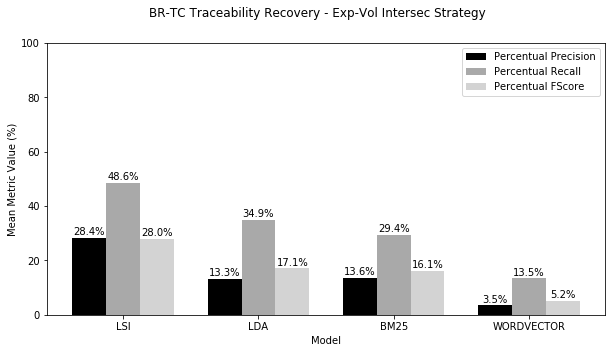

In [26]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-TC Traceability Recovery - Exp-Vol Intersec Strategy')

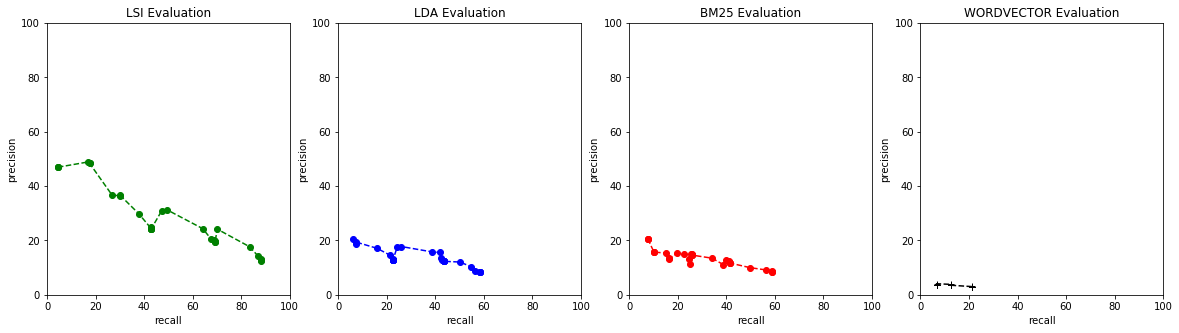

In [27]:
evaluator_2.plot_evaluations_4(evals_df_2)

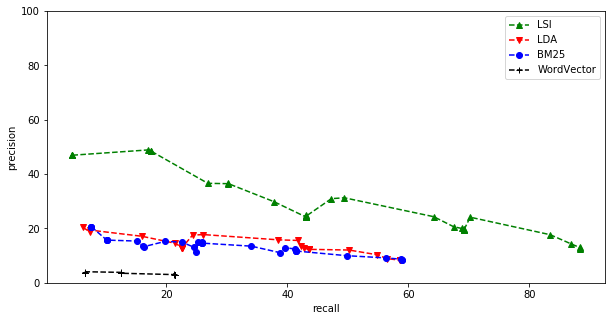

In [28]:
evaluator_2.plot_evaluations_5(evals_df_2)

### Oracle True Traces

In [29]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 514


#### Oracle

In [30]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().head())

### Retrieved Traces - Similarity Threshold 0.0

In [35]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.0])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall']].head(50)

top  sim_thresh       model TP_amount FP_amount FN_amount  precision  \
0   10         0.0         lsi       221       689       293      24.29   
3   10         0.0         lda       116       794       398      12.75   
6   10         0.0        bm25       133       778       381      14.60   
9   10         0.0  wordvector        34       876       480       3.74   
1   20         0.0         lsi       356      1464       158      19.56   
4   20         0.0         lda       224      1596       290      12.31   
7   20         0.0        bm25       213      1609       301      11.69   
10  20         0.0  wordvector        64      1756       450       3.52   
2   40         0.0         lsi       454      3186        60      12.47   
5   40         0.0         lda       301      3339       213       8.27   
8   40         0.0        bm25       303      3339       211       8.32   
11  40         0.0  wordvector       110      3530       404       3.02   

    recall  
0    43.00  
3    22.57  
6    25.88  
9     6.61  
1    69.26  
4    43.58  
7    41.44  
10   12.45  
2    88.33  
5    58.56  
8    58.95  
11   21.40

#### Traces Not Captured by Any Technique

In [38]:
print('TOP 10 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 20 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 40 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))

TOP 10 --------------------------
len(not_captured_traces): 203
percent not_captured_traces: 203/514 * 100 : 39.49%


TOP 20 --------------------------
len(not_captured_traces): 108
percent not_captured_traces: 108/514 * 100 : 21.01%


TOP 40 --------------------------
len(not_captured_traces): 36
percent not_captured_traces: 36/514 * 100 : 7.004%


#### Traces Captured by Every Technique

In [39]:
print('TOP 10 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))

TOP 10 -----------------------
len(traces_captured_by_all): 6
percent traces_captured_by_all: 6/514 * 100 : 1.167%


TOP 20 -----------------------
len(traces_captured_by_all): 27
percent traces_captured_by_all: 27/514 * 100 : 5.253%


TOP 40 -----------------------
len(traces_captured_by_all): 70
percent traces_captured_by_all: 70/514 * 100 : 13.62%


#### Similarity Matrices Analysis

##### **LDA**

In [40]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix())

##### **LSI**

In [44]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix())

##### **BM25**

In [45]:
#aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

##### **Word Vector**

In [46]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

#aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.9070996796178279
Std Similarity Value: 0.03517528954815485


#### LDA Topics

In [47]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: custom tab video toolbar link control drop item devic open
Topic #1: choos question display toolbar content ani close bookmark bar remov
Topic #2: widevin webm eme video support start load choos play web
Topic #3: download dropmak panel file click open item folder button icon
Topic #4: choos question display toolbar content ani close bookmark bar remov
Topic #5: pdf consol file browser theme child mode select use viewer
Topic #6: scroll mous apz make true sure config async wireless wire
Topic #7: icon awesom reader narrat speech bar display correctli mode text
Topic #8: choos question display toolbar content ani close bookmark bar remov
Topic #9: choos question display toolbar content ani close bookmark bar remov
Topic #10: bookmark toolbar desktop option warn work expect avail button tri
Topic #11: context menu page imag bring link option thi question open
Topic #12: text select field previou ha anoth differ keyboard left default
Topic #13: zoom indic bar locat key page disp

#### True Positives Analysis

In [50]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [51]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

TOP 10 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 28


LSI Exclusive TP:
len(lsi_exc_set): 98


LDA Exclusive TP:
len(lda_exc_set): 39


WV Exclusive TP:
len(wv_exc_set): 9


TOP 20 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 15


LSI Exclusive TP:
len(lsi_exc_set): 84


LDA Exclusive TP:
len(lda_exc_set): 13


WV Exclusive TP:
len(wv_exc_set): 7


TOP 40 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 6


LSI Exclusive TP:
len(lsi_exc_set): 83


LDA Exclusive TP:
len(lda_exc_set): 5


WV Exclusive TP:
len(wv_exc_set): 3



BM25 LSI LDA WordVector
TOP 10   28  98  39          9
TOP 20   15  84  13          7
TOP 40    6  83   5          3

#### False Positives Analysis

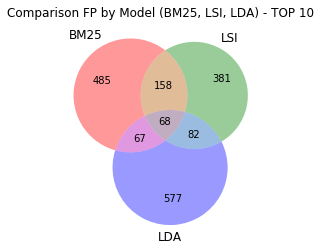

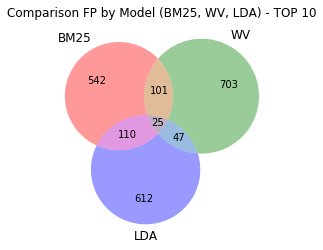

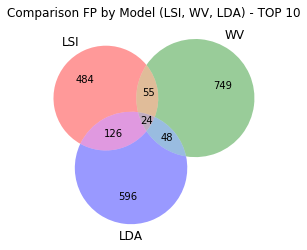

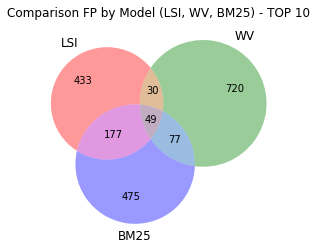

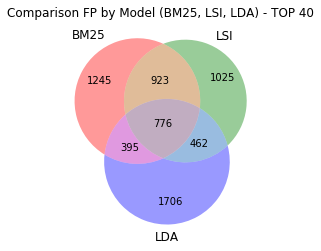

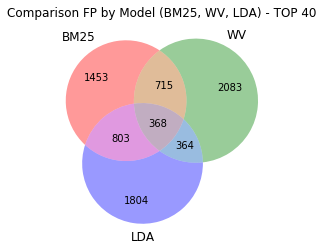

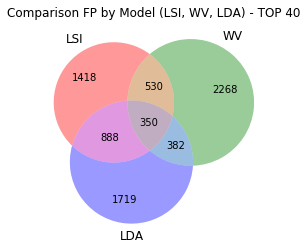

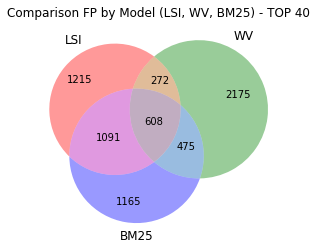

In [52]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

aux_functions.plot_venn_diagrams(10, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(40, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [53]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP')

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP')

TOP 10 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 416


LSI Exclusive FP:
len(lsi_exc_set): 358


LDA Exclusive FP:
len(lda_exc_set): 537


WV Exclusive FP:
len(wv_exc_set): 680


TOP 40 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 861


LSI Exclusive FP:
len(lsi_exc_set): 826


LDA Exclusive FP:
len(lda_exc_set): 1415


WV Exclusive FP:
len(wv_exc_set): 1884


#### False Negatives Analysis

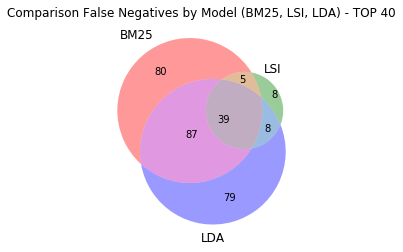

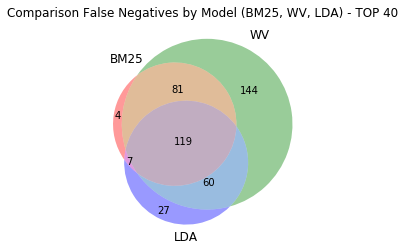

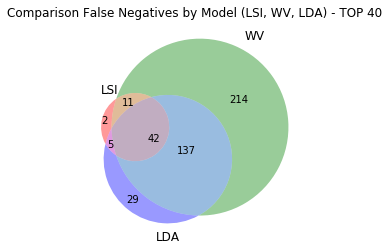

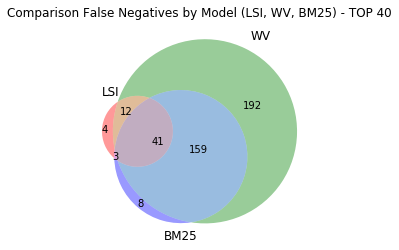

In [54]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'False Negatives')

##### Exclusive Traces

In [55]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN')

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN')

TOP 10 ------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 11


WV Exclusive FN:
len(wv_exc_set): 33


TOP 40 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 4


LSI Exclusive FN:
len(lsi_exc_set): 2


LDA Exclusive FN:
len(lda_exc_set): 25


WV Exclusive FN:
len(wv_exc_set): 138


### Retrieved Traces - Similarity Threshold 0.9

In [56]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[10,20,40], sim_threshs=[0.9])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall']].head(50)

top  sim_thresh       model TP_amount FP_amount FN_amount  precision  \
0   10         0.9         lsi        23        26       491      46.94   
3   10         0.9         lda        32       125       482      20.38   
6   10         0.9        bm25        39       150       475      20.63   
9   10         0.9  wordvector        34       802       480       4.07   
1   20         0.9         lsi        23        26       491      46.94   
4   20         0.9         lda        38       158       476      19.39   
7   20         0.9        bm25        39       150       475      20.63   
10  20         0.9  wordvector        64      1602       450       3.84   
2   40         0.9         lsi        23        26       491      46.94   
5   40         0.9         lda        38       166       476      18.63   
8   40         0.9        bm25        39       150       475      20.63   
11  40         0.9  wordvector       109      3204       405       3.29   

    recall  
0     4.47  
3     6.23  
6     7.59  
9     6.61  
1     4.47  
4     7.39  
7     7.59  
10   12.45  
2     4.47  
5     7.39  
8     7.59  
11   21.21

#### Traces Not Captured by Any Technique

In [59]:
print('TOP 10 --------------------------')
all_captured_traces_t10_inter = aux_functions.get_captured_traces_union(top_value=10, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t10_inter = oracle_true_traces_inter - all_captured_traces_t10_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t10_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t10_inter), len(oracle_true_traces_inter), len(not_captured_traces_t10_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 20 --------------------------')
all_captured_traces_t20_inter = aux_functions.get_captured_traces_union(top_value=20, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t20_inter = oracle_true_traces_inter - all_captured_traces_t20_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t20_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t20_inter), len(oracle_true_traces_inter), len(not_captured_traces_t20_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 40 --------------------------')
all_captured_traces_t40_inter = aux_functions.get_captured_traces_union(top_value=40, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t40_inter = oracle_true_traces_inter - all_captured_traces_t40_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t40_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t40_inter), len(oracle_true_traces_inter), len(not_captured_traces_t40_inter)/len(oracle_true_traces_inter)*100))

TOP 10 --------------------------
len(not_captured_traces): 413
percent not_captured_traces: 413/514 * 100 : 80.35%


TOP 20 --------------------------
len(not_captured_traces): 382
percent not_captured_traces: 382/514 * 100 : 74.32%


TOP 40 --------------------------
len(not_captured_traces): 344
percent not_captured_traces: 344/514 * 100 : 66.93%


#### Traces Captured by Every Technique

In [61]:
import pprint

print('TOP 10 -----------------------')
traces_captured_by_all_t10_inter = aux_functions.get_captured_traces_intersec(10, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t10_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t10_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t10_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t10_inter)

print('\n\nTOP 20 -----------------------')
traces_captured_by_all_t20_inter = aux_functions.get_captured_traces_intersec(20, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t20_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t20_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t20_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t20_inter)

print('\n\nTOP 40 -----------------------')
traces_captured_by_all_t40_inter = aux_functions.get_captured_traces_intersec(40, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t40_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t40_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t40_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t40_inter)

TOP 10 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


TOP 20 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


TOP 40 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/514 * 100 : 0.0%
set()


#### True Positives Analysis

In [62]:
bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'TP')
bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'TP')
bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [63]:
import pandas as pd

print("TOP 10 ------------------------------")
bm25_tp_exc_set_t10, lsi_tp_exc_set_t10, lda_tp_exc_set_t10, wv_tp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_tp_set_t10, lsi_tp_set_t10, lda_tp_set_t10, wv_tp_set_t10, traces_type='TP')

print("\n\nTOP 20 ------------------------------")
bm25_tp_exc_set_t20, lsi_tp_exc_set_t20, lda_tp_exc_set_t20, wv_tp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_tp_set_t20, lsi_tp_set_t20, lda_tp_set_t20, wv_tp_set_t20, traces_type='TP')

print("\n\nTOP 40 -------------------------------")
bm25_tp_exc_set_t40, lsi_tp_exc_set_t40, lda_tp_exc_set_t40, wv_tp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_tp_set_t40, lsi_tp_set_t40, lda_tp_set_t40, wv_tp_set_t40, traces_type='TP')

df = pd.DataFrame(index=['TOP 10', 'TOP 20', 'TOP 40'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 10','BM25'] = len(bm25_tp_exc_set_t10)
df.at['TOP 20','BM25'] = len(bm25_tp_exc_set_t20)
df.at['TOP 40','BM25'] = len(bm25_tp_exc_set_t40)

df.at['TOP 10','LSI'] = len(lsi_tp_exc_set_t10)
df.at['TOP 20','LSI'] = len(lsi_tp_exc_set_t20)
df.at['TOP 40','LSI'] = len(lsi_tp_exc_set_t40)

df.at['TOP 10','LDA'] = len(lda_tp_exc_set_t10)
df.at['TOP 20','LDA'] = len(lda_tp_exc_set_t20)
df.at['TOP 40','LDA'] = len(lda_tp_exc_set_t40)

df.at['TOP 10','WordVector'] = len(wv_tp_exc_set_t10)
df.at['TOP 20','WordVector'] = len(wv_tp_exc_set_t20)
df.at['TOP 40','WordVector'] = len(wv_tp_exc_set_t40)

print()

df

TOP 10 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 25


LSI Exclusive TP:
len(lsi_exc_set): 8


LDA Exclusive TP:
len(lda_exc_set): 23


WV Exclusive TP:
len(wv_exc_set): 22


TOP 20 ------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 21


LSI Exclusive TP:
len(lsi_exc_set): 8


LDA Exclusive TP:
len(lda_exc_set): 28


WV Exclusive TP:
len(wv_exc_set): 47


TOP 40 -------------------------------
BM25 Exclusive TP:
len(bm25_exc_set): 15


LSI Exclusive TP:
len(lsi_exc_set): 7


LDA Exclusive TP:
len(lda_exc_set): 28


WV Exclusive TP:
len(wv_exc_set): 85



BM25 LSI LDA WordVector
TOP 10   25   8  23         22
TOP 20   21   8  28         47
TOP 40   15   7  28         85

#### False Positives Analysis

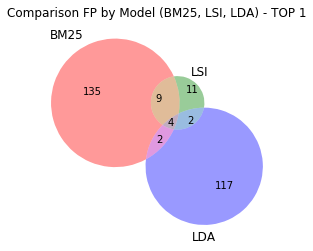

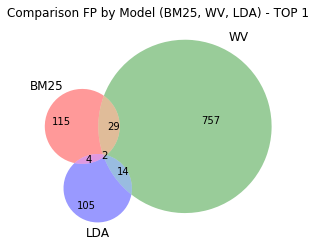

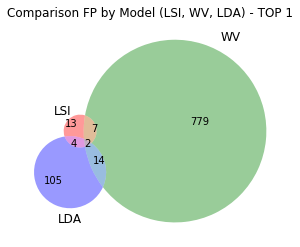

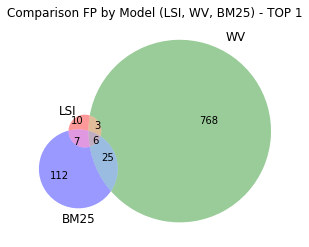

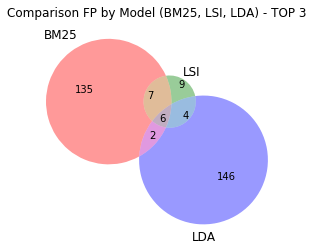

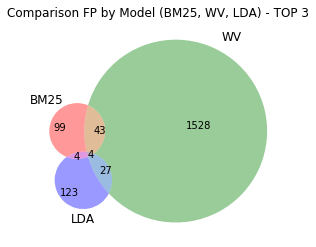

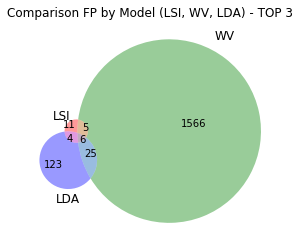

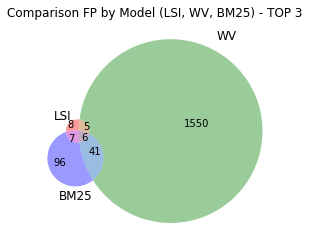

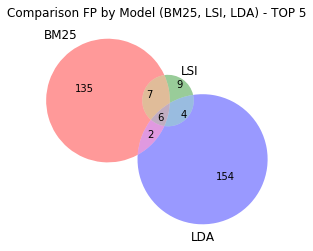

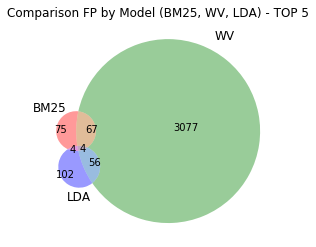

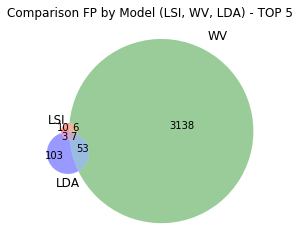

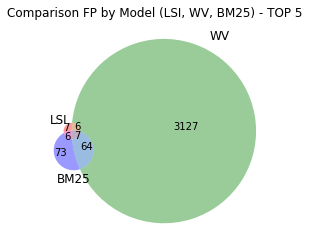

In [64]:
bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FP')
bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FP')
bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FP')

aux_functions.plot_venn_diagrams(1, bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(3, bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(5, bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, 'FP')

##### Exclusive Traces

In [65]:
print("TOP 10 ------------------------------")
bm25_fp_exc_set_t10, lsi_fp_exc_set_t10, lda_fp_exc_set_t10, wv_fp_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fp_set_t10, lsi_fp_set_t10, lda_fp_set_t10, wv_fp_set_t10, traces_type='FP')

print("\n\nTOP 20 ------------------------------")
bm25_fp_exc_set_t20, lsi_fp_exc_set_t20, lda_fp_exc_set_t20, wv_fp_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fp_set_t20, lsi_fp_set_t20, lda_fp_set_t20, wv_fp_set_t20, traces_type='FP')

print("\n\nTOP 40 -------------------------------")
bm25_fp_exc_set_t40, lsi_fp_exc_set_t40, lda_fp_exc_set_t40, wv_fp_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fp_set_t40, lsi_fp_set_t40, lda_fp_set_t40, wv_fp_set_t40, traces_type='FP')

TOP 10 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 110


LSI Exclusive FP:
len(lsi_exc_set): 8


LDA Exclusive FP:
len(lda_exc_set): 103


WV Exclusive FP:
len(wv_exc_set): 754


TOP 20 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 94


LSI Exclusive FP:
len(lsi_exc_set): 6


LDA Exclusive FP:
len(lda_exc_set): 121


WV Exclusive FP:
len(wv_exc_set): 1525


TOP 40 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 71


LSI Exclusive FP:
len(lsi_exc_set): 6


LDA Exclusive FP:
len(lda_exc_set): 101


WV Exclusive FP:
len(wv_exc_set): 3074


#### False Negatives Analysis

TOP 10 -----------------------------------


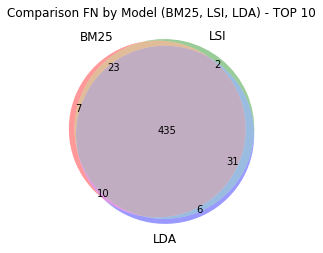

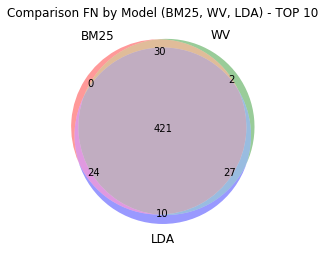

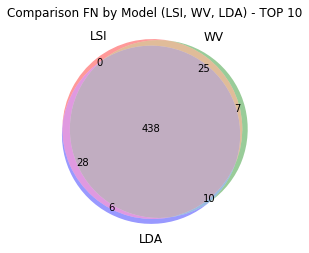

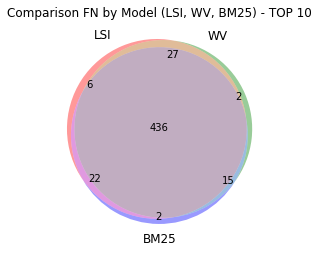



TOP 40 -----------------------------------


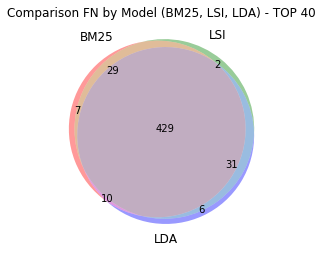

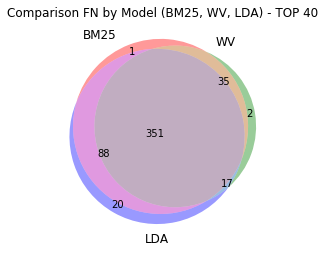

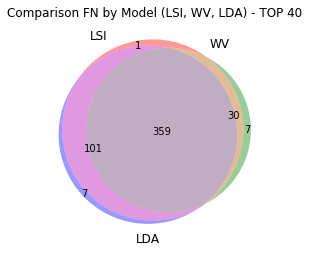

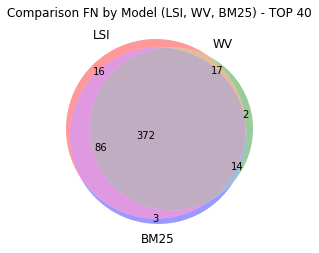

In [66]:
bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10 = aux_functions.get_traces_set(retrieved_traces_df, 10, 'FN')
bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20 = aux_functions.get_traces_set(retrieved_traces_df, 20, 'FN')
bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40 = aux_functions.get_traces_set(retrieved_traces_df, 40, 'FN')

print("TOP 10 -----------------------------------")
aux_functions.plot_venn_diagrams(10, bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, 'FN')

print("\n\nTOP 40 -----------------------------------")
aux_functions.plot_venn_diagrams(40, bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, 'FN')

##### Exclusive Traces

In [67]:
print("TOP 10 ------------------------------")
bm25_fn_exc_set_t10, lsi_fn_exc_set_t10, lda_fn_exc_set_t10, wv_fn_exc_set_t10 =  aux_functions.get_exclusive_traces(bm25_fn_set_t10, lsi_fn_set_t10, lda_fn_set_t10, wv_fn_set_t10, traces_type='FN', verbose=True)

print("\n\nTOP 20 -------------------------------")
bm25_fn_exc_set_t20, lsi_fn_exc_set_t20, lda_fn_exc_set_t20, wv_fn_exc_set_t20 =  aux_functions.get_exclusive_traces(bm25_fn_set_t20, lsi_fn_set_t20, lda_fn_set_t20, wv_fn_set_t20, traces_type='FN', verbose=True)

print("\n\nTOP 40 -------------------------------")
bm25_fn_exc_set_t40, lsi_fn_exc_set_t40, lda_fn_exc_set_t40, wv_fn_exc_set_t40 =  aux_functions.get_exclusive_traces(bm25_fn_set_t40, lsi_fn_set_t40, lda_fn_set_t40, wv_fn_set_t40, traces_type='FN', verbose=True)

TOP 10 ------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 20 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 40 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{(14, 1294733), (75, 1248267), (77, 1248267), (93, 1248267)}

len(lda_exc_set): 4


WV Exclusive FN:


set()

len(wv_exc_set): 0


### Recovery Effort Index (REI)

In [68]:
orc_vol_only_precision = 42.66
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [69]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

model
bm25           2.067862
lda            2.194396
lsi            0.908820
wordvector    11.519171
Name: rei, dtype: float64

### Goodness Scale

In [70]:
aux_functions.calculate_goodness(evals_df_2_1)

model  precision  recall precision_goodness recall_goodness
0        bm25      13.65   29.41                  -               -
1         lsi      28.43   48.63         Acceptable               -
2         lda      13.29   34.86                  -               -
3  wordvector       3.46   13.47                  -               -

### Delete Variables

## Volunteers Only Strategy

In [71]:
vol_strat_runner = tc_br_strat_runner.TC_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

OracleVolunteers.shape: (195, 91)
TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [72]:
evals_df_4.head()

model           ref_name  perc_precision  perc_recall  perc_fscore  \
0   lsi  top_10_cosine_0.0           33.08        24.98        28.46   
1   lsi  top_10_cosine_0.1           33.08        24.98        28.46   
2   lsi  top_10_cosine_0.2           33.19        24.98        28.50   
3   lsi  top_10_cosine_0.3           33.22        24.98        28.52   
4   lsi  top_10_cosine_0.4           33.19        24.90        28.45   

   sim_threshold   top  \
0            0.0  10.0   
1            0.1  10.0   
2            0.2  10.0   
3            0.3  10.0   
4            0.4  10.0   

                                                                                                                                                                                                                                                                                                                                                                                                    trace_links_df  
0  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
1  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
2  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
3  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...  
4  Bug_Number  1248267  1248268  1257087  1264988  1267480  1267501  1269348  \
TC_Number                                                                   
13                0        0        0        1        0        0        0   
14                0        0        0        1        0        0        0   
15                0        0        0        1        0        0        0   
16         ...

In [73]:
aux_functions.highlight_df(evals_df_4[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

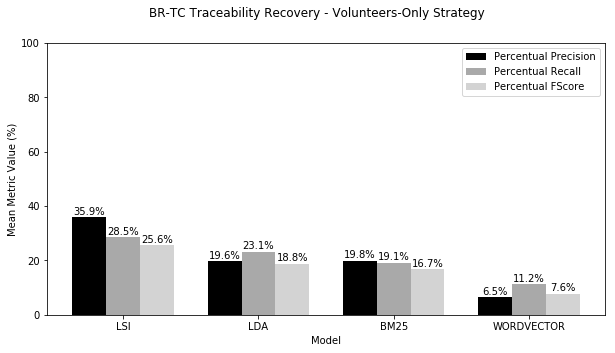

In [74]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-TC Traceability Recovery - Volunteers-Only Strategy')

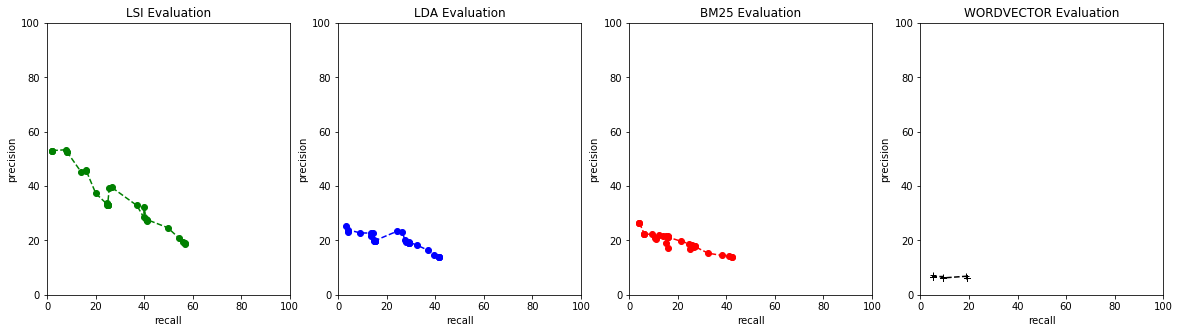

In [75]:
evaluator_4.plot_evaluations_4(evals_df_4)

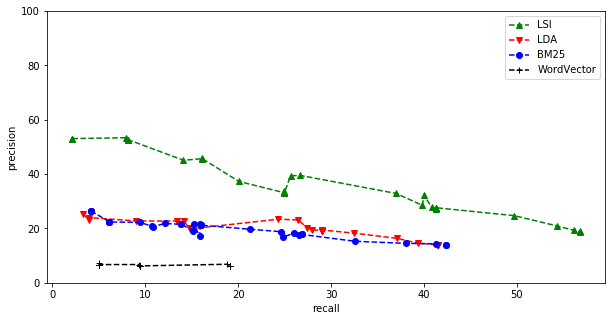

In [76]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Oracle True Traces

In [77]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_vol)))

len(oracle_true_traces_inter): 1205


#### Wrong Traces Exploration

In [78]:
sample_wrong_traces = set(list(oracle_true_traces_vol - oracle_true_traces_inter)[0:5])
sample_wrong_traces

{(15, 1271607), (89, 1313969), (91, 1289240), (103, 1306639), (142, 1316126)}

In [79]:
aux_functions.detail_features_tc_br(sample_wrong_traces, testcases, bugreports)

tc          tc_feat       br  \
0   15  New Awesome Bar  1271607   
1   89     Context Menu  1313969   
2  103     Context Menu  1306639   
3   91     Context Menu  1289240   
4  142  Zoom Indicator   1316126   

                                                                                            br_summary  
0                          The new window's size is modified if the last closed window had pinned tabs  
1                    [Follow-up] Ctrl+Click awesomebar entry with "Switch to Tab" doesn't open new tab  
2       Searching in locationbar by typing something and pressing enter is not accounted in telemetry.  
3  Services.search.getDefaultEngines() empty, search engine reset triggered when using a language pack  
4                                                    `_endRemoveTab` can get stuck in an infinite loop

In [87]:
#aux_functions.highlight_ranking_tc_br([br for tc,br in sample_wrong_traces], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)
aux_functions.highlight_ranking_tc_br([1271607], exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix(), top_value=40)

In [ ]:
brs_list = [1314643]
matrix = vol_strat_runner.get_oracle()
matrix = exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix()
top_value = 20

tcs_set = set()
for br in brs_list:
    tcs_list = matrix.nlargest(n=top_value, columns=br, keep='first').index.to_list()
    for tc in tcs_list:
        tcs_set.add(tc)

aux_functions.highlight_df(matrix.loc[tcs_set,brs_list].sort_index())

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = tc_br_strat_runner.TC_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-TC Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = tc_br_strat_runner.TC_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-TC Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables